In [109]:
import csv

input_file = 'data/Crime_rate_1960-2019.csv'
output_file = 'data/clean_Crime_rate_1960-2019.csv'

with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    for row in reader:
        # Remove commas from each element in the row
        row_without_commas = [element.replace(',', '') for element in row]
        row_without_commas = [element.replace('*', '') for element in row_without_commas]
        # Remove column 1,2
        del row_without_commas[1:3]
        writer.writerow(row_without_commas)


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

monthly_inflation_rates = pd.read_csv('data/US_inflation_rates.csv')

In [111]:
# the following code computes the weighted annual inflation rate and filters years

years = []
inflations = []
inflation_array = []
previous = 0.0
not_found = True
cur_year = ''
cycle = False
for x in monthly_inflation_rates.values:
  if not_found:
    date = x[0]
    if date.startswith('1959-12-01'):
      not_found = False
    else:
      continue
  else:
    date = x[0]
    if cur_year == '':
      if cycle:
        cur_infl = x[1]
        infl = (cur_infl-previous)/previous
        inflation_array.append(infl)
        # previous = cur_infl
        np_array = np.array(inflation_array)
        inflation_array = []
        sum = np_array.sum()
        inflations.append(sum)
      cur_year = date[:4]
      if cur_year.startswith('2020'):
        break
      previous = x[1]
      Y = int(cur_year)
      years.append(Y)
    else:
      cur_infl = x[1]
      infl = (cur_infl-previous)/previous
      infl*=100
      # rounded = round(infl, 3)
      inflation_array.append(infl)
      previous = cur_infl
      if date[5:7]=='12':
        cur_year = ''
        cycle = True


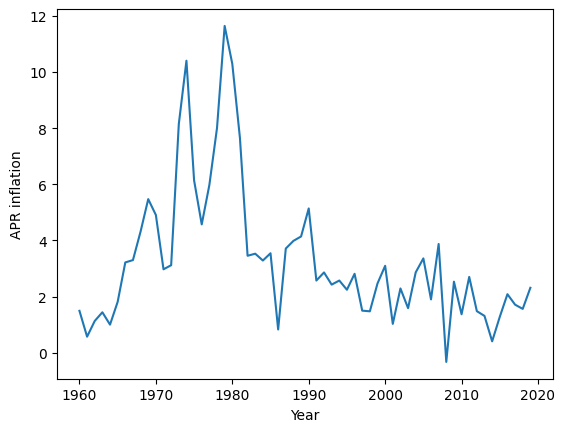

In [112]:
plt.plot(years, inflations)
plt.ylabel("APR inflation")
plt.xlabel("Year")
plt.show()

In [113]:
crimes = pd.read_csv('data/clean_Crime_rate_1960-2019.csv')


In [114]:
def convertToInt(arr):
  out = []
  for x in arr:
    # x = x[0:4]
    # print(x)
    converted = np.double(x)
    out.append(converted)
  return out

In [115]:
start = True
previous = 0
growth = []
year_growth = []

for x in crimes.values:
  y = x[0]
  p = x[1]
  year = np.int16(y)
  pop = np.double(p)
  if start:
    previous = pop
    start = False
    continue
  else:
    cur_growth = (pop - previous) / previous
    cur_growth *= 100
    growth.append(cur_growth)
    year_growth.append(year)
    previous = pop



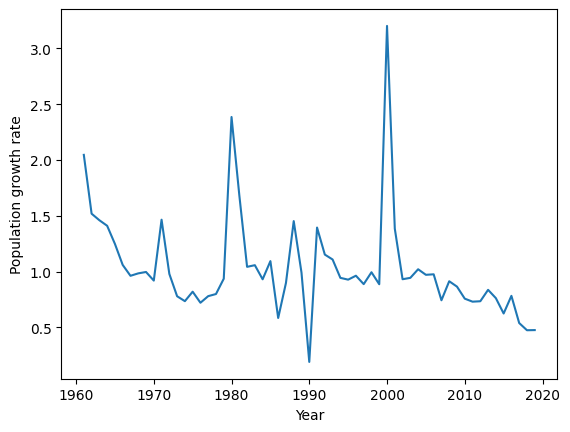

In [116]:
plt.plot(year_growth, growth)
plt.ylabel("Population growth rate")
plt.xlabel("Year")
plt.show()

In [117]:
def computeChange(data, years):
  start = True
  previous = 0
  growth = []
  year_growth = []

  for i in range(len(data)):
    cur = data[i]
    if start:
      previous = cur
      start = False
      continue
    else:
      year = years[i]
      cur_growth = (cur - previous) / previous
      cur_growth *= 100
      growth.append(cur_growth)
      year_growth.append(year)
      previous = pop

  return (growth, year_growth)

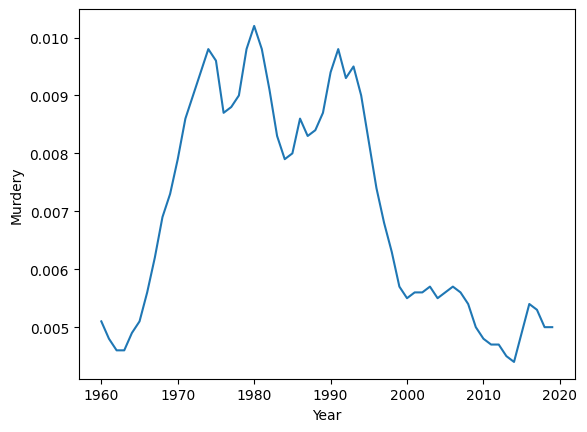

In [118]:
years_crime = crimes['Year\xa0']
murders = crimes['Murder\xa0']

mur = convertToInt(murders)
year_crime = convertToInt(years_crime)
#convert mur to np array
mur = np.array(mur)
year_crime = np.array(year_crime)
mur = (mur/100000)*100
plt.plot(year_crime, mur)
plt.ylabel("Murdery")
plt.xlabel("Year")
plt.show()

In [119]:
mur_growth, mur_year = computeChange(mur, year_crime)

murr_corr = pd.Series(mur_growth)
pop_corr = pd.Series(growth)
murr_corr.corr(pop_corr)

0.2916850361008071

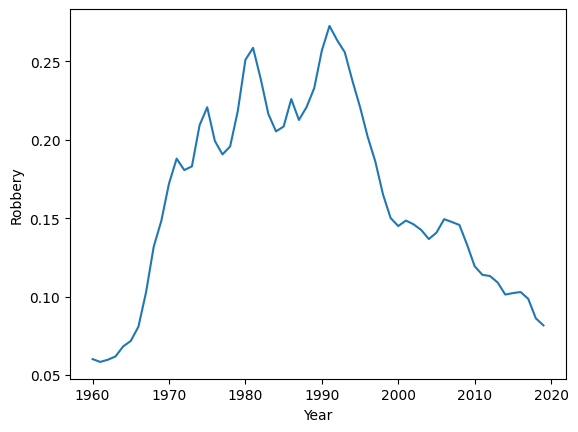

In [120]:
thefts = crimes['Robbery\xa0']
roberry = convertToInt(thefts)
roberry = (np.array(roberry)/100000)*100
plt.plot(year_crime, roberry)
plt.ylabel("Robbery")
plt.xlabel("Year")
plt.show()

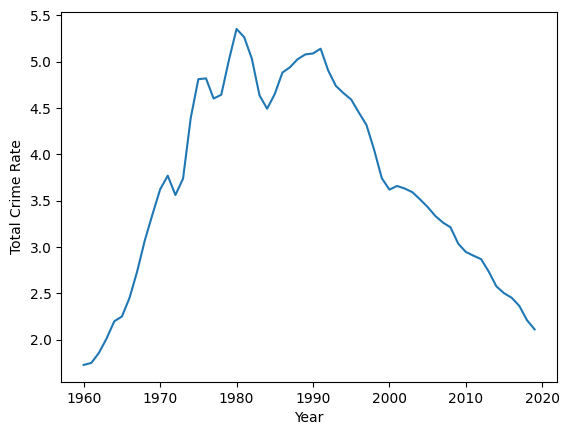

In [121]:
Y = crimes['Year\xa0']
years_ratio = convertToInt(Y)

population = []
total = []
for x in crimes.values:
  pop = x[3]
  tot = x[4]
  pop = np.double(pop)
  tot = np.double(tot)
  total.append(tot)
  population.append(pop)


for i in range(len(total)):
  popul = population[i]
  k = popul / 100000
  total_crimes = total[i] * k
  total[i] = total_crimes / popul
  total[i] *= 100
  # total[i] = total_crimes

# plt.plot(years_ratio, population)
plt.plot(years_ratio, total)
plt.xlabel("Year")
plt.ylabel("Total Crime Rate")
plt.show()

Index(['Year ', 'Population ', 'Total ', 'Violent ', 'Property ', 'Murder ',
       'Forcible Rape ', 'Robbery ', 'Aggravated assault ', 'Burglary ',
       'Larceny Theft ', 'Vehicle Theft '],
      dtype='object')


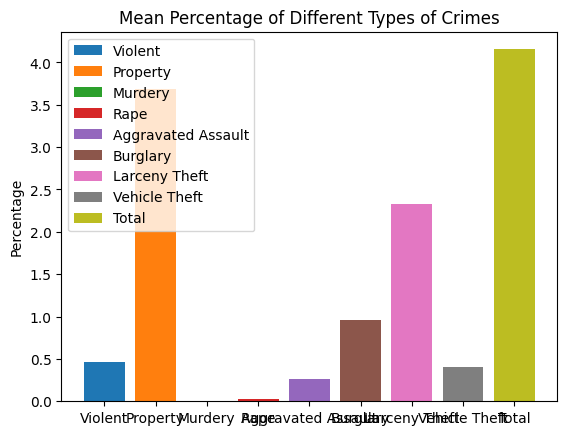

In [122]:
# bar chart of different types of crimes
print(crimes.columns)
violent = crimes['Violent\xa0']
prop = crimes['Property\xa0']
murr = crimes['Murder\xa0']
rape = crimes['Forcible Rape\xa0']
agg_assault = crimes['Aggravated assault\xa0']
burglary = crimes['Burglary\xa0']
larceny = crimes['Larceny Theft\xa0']
motor = crimes['Vehicle Theft\xa0']
total = crimes['Total\xa0']

violent = convertToInt(violent)
prop = convertToInt(prop)
murr = convertToInt(murr)
rape = convertToInt(rape)
agg_assault = convertToInt(agg_assault)
burglary = convertToInt(burglary)
larceny = convertToInt(larceny)
motor = convertToInt(motor)
total = convertToInt(total)

violent = (np.mean(np.array(violent))/100000)*100
prop = (np.mean(np.array(prop))/100000)*100
murr = (np.mean(np.array(murr))/100000)*100
rape = (np.mean(np.array(rape))/100000)*100
agg_assault = (np.mean(np.array(agg_assault))/100000)*100
burglary = (np.mean(np.array(burglary))/100000)*100
larceny = (np.mean(np.array(larceny))/100000)*100
motor = (np.mean(np.array(motor))/100000)*100
total = (np.mean(np.array(total))/100000)*100

#bar chart of different types of crimes
plt.bar(['Violent'], violent, label="Violent")
plt.bar(['Property'], prop, label="Property")
plt.bar(['Murdery'], murr, label='Murdery')
plt.bar(['Rape'], rape, label="Rape")
plt.bar(['Aggravated Assault'], agg_assault, label="Aggravated Assault")
plt.bar(['Burglary'], burglary, label="Burglary")
plt.bar(['Larceny Theft'], larceny, label="Larceny Theft")
plt.bar(['Vehicle Theft'], motor, label="Vehicle Theft")
plt.bar(['Total'], total, label="Total")

plt.ylabel('Percentage')
plt.title('Mean Percentage of Different Types of Crimes')
plt.legend()

plt.show()


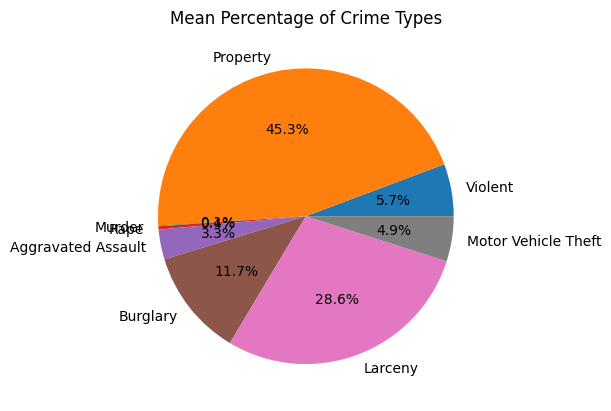

In [137]:
# Data for the pie chart
crime_data = [violent, prop, murr, rape, agg_assault, burglary, larceny, motor]
crime_labels = ['Violent', 'Property', 'Murder', 'Rape', 'Aggravated Assault', 'Burglary', 'Larceny', 'Motor Vehicle Theft']

# Create the pie chart
plt.pie(crime_data, labels=crime_labels, autopct='%1.1f%%')
plt.title('Mean Percentage of Crime Types')
plt.show()